# MBA FIAP Inteligência Artificial & Machine Learning

<p align="center">
<img src="imagens/smart-hiring.jpg">
</p>

## Tecnologia de Processamento de Imagens
## Projeto Final Smart-Hiring: Entrevista Virtual

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir uma aplicação que tem por objetivo analisar imagens e extrair uma série de informações que serão utilizadas para compor uma análise de seleção de candidatos para uma entrevista simulada.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM 12345      | `1IA` |
| Integrante 2             | RM 12345      | `1IA` |
| Integrante 3             | RM 12345      | `1IA` |
| Integrante 4             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```## IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Detector de objeto (cartão de identificação)__
2. __Detector de faces__
3. __Detector de sorriso__
4. __Detector de bocejo__
5. __Detector de olhos fechados__
6. __Descritor de objetos na cena__
7. __Conclusões Finais__


## Introdução

_Disclaimer: as informações do caso de uso de negócio são meramente ilustrativas para aplicar as tecnologias de visão computacional de forma mais aderente ao desafio proposto. Todos os comentários foram forjados para dar vazão aos desafios e não representam formas de avaliação de candidatos. A empresa em questão, a Wandee, é fictícia._

A empresa **Wandee**, especializada em entrevistas virtuais, está construindo um produto minimamente viável (MVP) para testar algumas tecnologias voltadas a visão computacional para tornar o processo de seleção, especialmente a etapa de entrevista mais completo, rápido e que permita aos recrutadores obterem feedbacks mais completos além da profunidade técnica de cada posição, como por exemplo, se o candidato é ele mesmo (prova de identidade), se possuí o cartão de acesso a entrevista, aspectos de atenção durante a entrevista, como concentração e foco. Ainda será analisado questões de organização no local do entrevistado, buscando por objetos na visão da câmera.

Todo o processo de entrevista virtual é feito remotamente por meio de uma câmera (_webcam_). Logo, todos os algoritmos desenvolvidos precisam capturar as imagens desta origem.

## 1. Detector de objeto

Antes de começar com o processo de autenticação, os candidatos precisam utilizar o celular e exibir o ícone da empresa para a câmera. Se o resultado for positivo indica que o sistema pode avançar para a próxima etapa.

<p align="center">
<img src="imagens/logo.png" height="60%" width="60%">
</p>

Construa um algortimo que seja capaz de analisar uma região de interesse específica (ROI, _Region of Interest_), capturada por vídeo, e valide se o ícone está presente ao ser exibido pelo celular do candidato. 

Lembre-se que questões de proporção e rotação precisam ser consideradas na identificação.

Este processo precisa ser de rápida identificação, neste caso não será possível aplicar técnicas que envolvam aprendizado de máquina. É indicado o uso de detectores de objetos e extratores de características.

_No seu smartphone abra o navegador e entre com o link https://raw.githubusercontent.com/michelpf/fiap-ml-tec-proc-imagens-capstone/master/projeto-final/imagens/logo.png_

Ou, escaneie com seu smartphone o QRCode abaixo.

<p align="center">
<img src="imagens/qrcode.png" height="25%" width="25%">
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from scipy.spatial import distance as dist
import collections
from matplotlib.pyplot import figure
import datetime

%matplotlib inline

A função abaixo deve receber uma imagem capturada da região de interesse e comparar com a imagem template do logotipo de empresa. O retorno é o número de correspondências encontradas.

In [2]:

# detector ORB
detectorORB =     cv2.ORB_create( 1500 )
# parâmetros para o FLANN
paramsIndex = {
    'algorithm':          6 ,
    'table_number':       6 ,
    'key_size':           12 ,
    'multi_probe_level':  1 ,
}
paramsBusca = {
    'checks':             80 ,
}
# comparador FLANN
comparadorFLANN = cv2.FlannBasedMatcher( paramsIndex, paramsBusca )


Carregue a imagem de template.

In [3]:
# lista de imagens
imagensStr = [
    'logos/img_preto.png',
    'logos/img_branco.png',
]
imagens = [] # aqui estarão as descrições do ORB
evidenciaNome = 'evidencia.png'

for imgStr in imagensStr :
    temp = cv2.imread( imgStr )
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY )
    temp = cv2.GaussianBlur( temp, (7,7), 0 )
    keyPoints =       detectorORB.detect( temp, None )
    keyPoints, desc = detectorORB.compute( temp, keyPoints )
    imagens.append( desc )
  

Utilize a função ```detector``` para obter as correspondências identificadas. Por meio de testes prévios, estabeleça qual o valor de _matches_ para o template definido. Isto pode fazer com que ajuste valores do detector ORB para ajustes, é um processo de experimentação.

Após definir o limiar, desenvolva uma regra para comparar com o valor de _matches_ e exibir em tempo real se o template foi localizado.

In [4]:
# Função de suporte para exibição de imagens no Jupyter

def exibir_imagem(imagem):
    figure(num=None, figsize=(15, 10))
    image_plt = mpimg.imread(imagem)
    plt.imshow(image_plt)
    plt.axis('off')
    plt.show()


# definição de constantes para o processo de captura e detecção do logo
cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
num = 0
corte = 150


O trecho de códido abaixo é para iniciar a captura de imagens da câmera. Nela será definido uma região de interesse que deverá ser capturado uma imagem para acionar a função de detecção.

In [5]:

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break
    start_time = datetime.datetime.now()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur( gray, (7,7), 0 )

    keyPointsAlvo = detectorORB.detect( gray, None )
    keyPointsAlvo, descAlvo = detectorORB.compute( gray, keyPointsAlvo )

    buscas = []

    for imgDesc in imagens:
        try:
            encontrados = comparadorFLANN.knnMatch( imgDesc, descAlvo, k = 2 )
        except cv2.error:
            encontrados = []
        # matchesMask = [ [0,0] for i in range( len( encontrados ) ) ]
        mEncontrados = 0
        try:
            for i, v in enumerate( encontrados ):
                if v is not False and len(v) > 1:
                    (m, n) = v
                    if m.distance < 0.6 * n.distance:
                        mEncontrados += 1
                        # matchesMask[ i ] = [ 1, 0 ]
        except ValueError:
            pass
        buscas.append( mEncontrados )
        if mEncontrados > corte :
            break
        pass

    maiorEncontrado = np.max( np.array( buscas ) )
    foiEncontrado =   maiorEncontrado > corte

    elapsed_time = datetime.datetime.now() - start_time

    # acerto
    cv2.putText(
        frame, str( maiorEncontrado ) ,(10,40), cv2.FONT_HERSHEY_SIMPLEX, 1,
        (0,230,0) if (foiEncontrado) else (0,0,235),
        1, cv2.LINE_AA)

    # tempo para busca nas imagens
    cv2.putText(
        frame, 'Tempo (us): '+ str( elapsed_time.microseconds ) ,(10,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (200,200,0), 1, cv2.LINE_AA)

    if foiEncontrado:
        cv2.imwrite( evidenciaNome, frame )
    
    cv2.imshow('Encontrar logo na imagem', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        break

cap.release()
cv2.destroyAllWindows()

Armazene uma evidência do logotipo detectado, exibindo na imagem a região de interesse com a imagem.

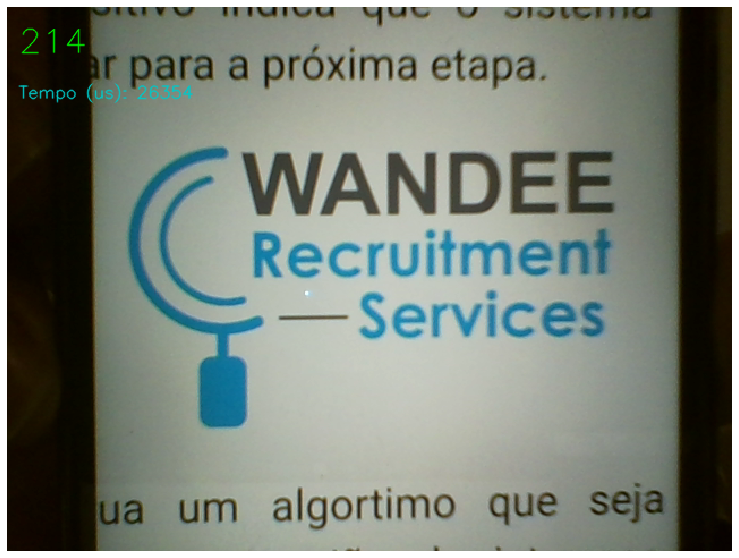

In [6]:
exibir_imagem( evidenciaNome )

## 2. Detector de faces

Para validação de autenticidade do candidado, o processo de entrevista virtual precisa confirmar se a pessoa selecionada para a entrevista é a mesma. Neste caso a técnica a ser utilizada é por meio de um reconhecimento facial,

Inicialmente, precisamos treinar um classificador próprio do OpenCV com exemplos de imagem do candidato.
Eleja uma pessoa do grupo para ser o candidato e treine um conjunto de imagens suficiente para que seja possível alcançar similaridade, onde o valor de não similaridade seja de até 40 pontos. O algortimo de similaridade de faces utiliza um sistema que quando a face é idêntica, o número de pontos é igual a 0, se for totalmente diferente, tende ao infinito. Logo, patamar de 30 a 40 é um bom número de similaridade.

**Implementação**

Nesta etapa inicial será realizado o treinamento das faces de um determinado candidato.
Você precisará coletar um número de imagens relevante do candidato. Além disso, é recomendável aplicação de um detector de faces para que seja extraído somente a _região de interesse_ ou seja, a própria face. Uma maneira de conseguir este tipo de segmentação é utilizando um classificador em cascada de Haar treinado para este fim.

Utilize a função a abaixo para segmentar o rosto de uma imagem.

In [7]:
# carregar classificador em cascata
face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        return cropped_face, x,y,w,h

    return None, None,None,None,None

Crie um algoritmo para que treine um determinado número de faces, escolhido pelo grupo, par que seja armazenado em um diretório específico para posteior treinamento.

In [8]:
# salvar imagens de treino

cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
contagem = 100
prefixo = 'faces/imagem_'
sufixo = '.png'

print("Iniciando coleta de amostras")
while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break
    
    imgFace, x,y,w,h = face_extractor( frame )

    if imgFace is not None:
        cv2.imwrite( prefixo + str( contagem ) + sufixo, imgFace )
        contagem -= 1

    # quantidade de coletas faltando
    cv2.putText(
        frame, 'Coletas restantes: '+ str( contagem ) ,(10,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)
        
    cv2.imshow('Imagem de Treino', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 or contagem < 0 :
        break

cap.release()
cv2.destroyAllWindows()
print("Coleta de amostras concluída")

Iniciando coleta de amostras
Coleta de amostras concluída


O treinamento utilizando é um próprio classificador de faces que o OpenCV possui. Neste caso vamos optar pelo classificador Local Binary Patterns Histograms (LBPH), que para este cenário é o mais adequado.

O grupo pode optar por escolher outros tipos de algoritmos do OpenCV, se desejarem.

In [9]:
# IMPLEMENTAR
# Defina o diretório utilizado para salvar as faces de exemplo

data_path = 'faces/'

onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
training_data, labels = [], []

for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
print("Iniciando treinamento do modelo.")
model = cv2.face.LBPHFaceRecognizer_create()
model.train(training_data, labels)
print("Modelo treinado com sucesso.")

# IMPLEMENTAR
# Defina na chave 0 o nome do candidato

persons = { 0: 'Eu' }

Iniciando treinamento do modelo.
Modelo treinado com sucesso.


Vamos considerar uma classificação com sucesso quando a distândia de predição da face analisada for entre 30 e 40. Os valores de retorno destes classificador não é um índice de confiança.

Quando houver uma deteção dentro da margem de distância, armazene a imagem com o nome "success_candidate.png", constando as informações do nome do candidato e a distância identificada pelo classificador (retorno do método _predict_).

Escreva na tela onde a imagem da câmera é capturada a informação da distância de detecção da face extraída versus a face treinada, emuldure a face num retângulo e, se a face for devidadamente identificada, inclua um texto com a informação "```<Nome do candidato>``` Reconhecido"

In [10]:
# Detectar face

cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
nomeFinal = 'success_candidate.png'

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break
    
    imgFace, x,y,w,h = face_extractor( frame )
    conf = -1
    nomeFace = 'Ninguem'
    encontrado = False

    if imgFace is not None:
        temp = cv2.cvtColor(imgFace, cv2.COLOR_BGR2GRAY )
        ids, conf = model.predict( temp )
        if conf < 40:
            encontrado = True
            nomeFace = persons[ ids ]
            # colocar retângulo em torno da face: ( img, (x,y), (w,h), cor, tamLinha )
            cv2.rectangle( frame, (x,y), (x+w,y+h), (0,64,200), 2)

    # grau de confiança da face analisada em relação a uma face esperada
    cv2.putText(
        frame, 'Confianca: '+ str( conf ) ,(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)
    # face encontrada
    cv2.putText(
        frame, 'Reconhecido: '+ str( nomeFace ) ,(10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)

    # gravar imagem final, com os resultados
    if encontrado:
        cv2.imwrite( nomeFinal, frame )

    cv2.imshow('Encontrar face na imagem', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        break

cap.release()
cv2.destroyAllWindows()  

Guarde como evidência de classificação bem sucedida, uma imagem capturada da câmera durante o processo.

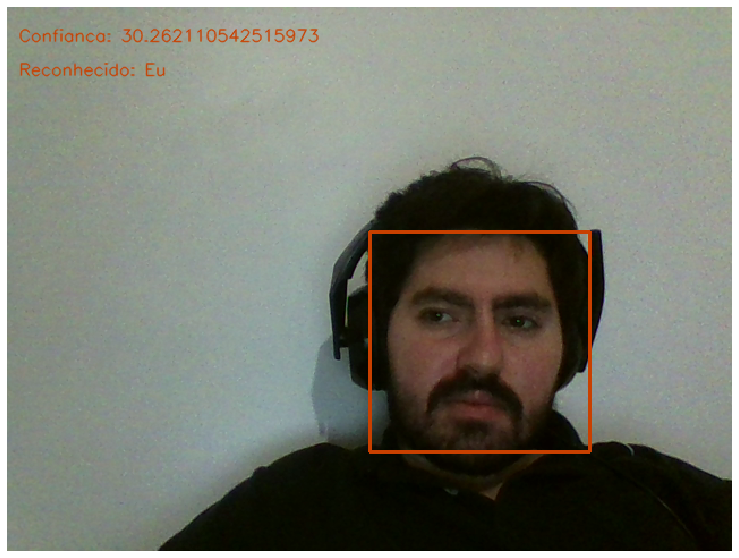

In [11]:
exibir_imagem( nomeFinal )

## 3. Detector de sorriso

Muitas empresas demandam que futuros empregados demonstrem educação, tranquilidade e empatia, características que podem ser evidencias com uma uma análise simples da receptividade do candidado por meio das expressões de seu rosto.

Um detector importante disto é sobre se o candidato mantém o semblante fechado ou se mantém um rosto alegre, oscilando sorrisos a medida que é realizada a entrevista e demais questionamentos.

Utilize as bibliotecas do _DLib_, em especial o preditor treinado para 68 pontos de marcação de face, para identificar a geometria dela e obtenha as marcações de interesse.

Uma das formas de extraírmos os pontos de contorno da face é utilizando o modelo do _DLib_ ```shape_predictor_68_face_landmarks.dat```. Este modelo retorna 68 pontos da face

In [12]:
import dlib
import numpy as np
import cv2
from scipy.spatial import distance as dist

predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

Liste os pontos de cada parte do rosto. A partir deles poderão ser feitos estudos geométricos para identificar características relcioandos aos mesmos.

In [13]:
FACE_POINTS =       list(range(0, 68))  # 68
MOUTH_POINTS =      list(range(48, 61)) # 13
RIGHT_BROW_POINTS = list(range(17, 22)) # 5
LEFT_BROW_POINTS =  list(range(22, 27)) # 5
RIGHT_EYE_POINTS =  list(range(36, 42)) # 6
LEFT_EYE_POINTS =   list(range(42, 48)) # 6
NOSE_POINTS =       list(range(27, 35)) # 8
JAW_POINTS =        list(range(0, 17))  # 17

Crie uma função que será utilizada para identificar um sorriso. Leve em consideração estudos que envolvem cálculo de razão de aspecto geométrico e adapte para os pontos dos lábios.

Estude o paper de [Soukupová e Čech de 2016](http://vision.fe.uni-lj.si/cvww2016/proceedings/papers/05.pdf) para entender como obter um cálculo de aspecto de razão para formas geométricas da face. Você pode fazer aproximações a partir do estudo do paper para outras formas, como os lábios e olhos.

Crie uma função ```mouth_aspect_ratio``` que receba os pontos dos lábios e calcule o aspecto de razão para que seja exibida dados de quando a boca está aberta, fechada, dentre outros comportamentos.

In [14]:
def mouth_aspect_ratio(mouth):
    pontos = np.array( mouth )
    
#     h1 = dist.euclidean( pontos[1] , pontos[11] )
    h2 = dist.euclidean( pontos[2] , pontos[10] )
    h3 = dist.euclidean( pontos[3] , pontos[9] )
    h4 = dist.euclidean( pontos[4] , pontos[8] )
#     h5 = dist.euclidean( pontos[5] , pontos[7] )

    w1 = dist.euclidean( pontos[0] , pontos[6] )

    ra = ( h2 + h3 + h4 ) / ( 3.0 * w1 )
    
    return ra

# essa será usada mais abaixo
def eye_aspect_ratio(pontos):
    pontos = np.array( pontos )
    h1 = dist.euclidean( pontos[1] , pontos[5] )
    h2 = dist.euclidean( pontos[2] , pontos[4] )

    w1 = dist.euclidean( pontos[0] , pontos[3] )

    ra = ( h1 + h2 ) / ( 2.0 * w1 )
    return ra

Na função abaixo, inclua um segundo retorno que será a razão de aspecto dos lábios. Deixe como está o terceiro retorno, pois ele será estudado no próximo algoritmo.

In [15]:
def annotate_landmarks_convex_hull_image(im):
    im = im.copy()
    rects = detector(im, 1)
    
    if len(rects) == 0:
        return im, 0, 0
    
    landmarks_list = []
    
    for rect in rects:
        landmarks = np.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])

        for k, d in enumerate(rects):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (0, 255, 0), 2)

            points = cv2.convexHull(landmarks[NOSE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[MOUTH_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            points = cv2.convexHull(landmarks[RIGHT_BROW_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[LEFT_BROW_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[RIGHT_EYE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            points = cv2.convexHull(landmarks[LEFT_EYE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            mouth_aspect = mouth_aspect_ratio( landmarks[MOUTH_POINTS] )
            eye_aspect_l = eye_aspect_ratio( landmarks[LEFT_EYE_POINTS] )
            eye_aspect_r = eye_aspect_ratio( landmarks[RIGHT_EYE_POINTS] )
            eye_aspect_m = (eye_aspect_r + eye_aspect_l) / 2

    return im, mouth_aspect, eye_aspect_m

Realize ensaios para definir o valor de sorriso versos simulações com os lábios normais e aberto. Um sorriso é uma estado entre os lábios fechados ou semi-fechados e a boca inteiramente aberta.
Definina abaixo os limiares inferior e superior para a identificação de um sorriso.

In [25]:
# valores no bloco abaixo

Após identificar o sorriso, contabilize quantas vezes foram identificados.

In [16]:
cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
nomeImg = 'imagens/sorriso.png'
qtd = 0
sorriso_minimo = 0.30
sorrimo_maximo = 0.36
detectado = False

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break

    frame, mouth_aspect, _ = annotate_landmarks_convex_hull_image(frame)
    prevDetectado = detectado
    detectado = False

    if mouth_aspect < sorriso_minimo or mouth_aspect > sorrimo_maximo:
        detectado = True
        if prevDetectado is False:
            qtd += 1

    cv2.putText(
        frame, 'Mouth Aspect Ratio: '+ str( mouth_aspect ) ,(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)
    cv2.putText(
        frame, 'Sorrindo' if detectado else 'Neutro' ,(10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)

    if detectado:
        cv2.imwrite( nomeImg, frame )

    cv2.imshow('Detector de sorrisos', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        break

cap.release()
cv2.destroyAllWindows()
print("Sorrisos identificados: %s" % str(qtd))

Sorrisos identificados: 19


Armazene um exemplo de uma imagem, na pasta ```imagens``` com o sorriso detectado para exibição.

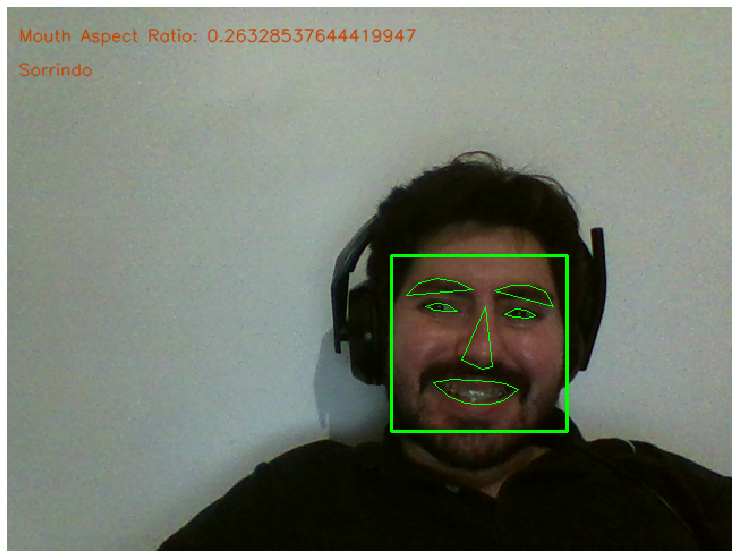

In [17]:
exibir_imagem(nomeImg)

## 4. Detector de bocejos

Os candidados devem estar sempre atentos durante a entrevista virtual. Para garantir que ele se preparou adequadamente antes do início da entrevista não deverá ser tolerado bocejos.

Um detector de bocejos deverá utilizar aspectos das marcações dos lábios já definidas para identificar o bocejo. Neste caso o que será diferente é o valor da razão de aspecto.

Neste caso não há um limiar, como o bocejo é a boca aberta ao máximo, vamos definir um valor mínimo.

In [ ]:
# valores no bloco abaixo

In [18]:

cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
nomeImg = 'imagens/bocejo.png'
qtd = 0
bocejo_minimo = 0.55
detectado = False

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break

    frame, mouth_aspect, _ = annotate_landmarks_convex_hull_image(frame)
    prevDetectado = detectado
    detectado = False

    if mouth_aspect > bocejo_minimo:
        detectado = True
        if prevDetectado is False:
            qtd += 1

    cv2.putText(
        frame, 'Bocejo Aspect Ratio: '+ str( mouth_aspect ) ,(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)
    cv2.putText(
        frame, 'Bocejando' if detectado else 'Neutro' ,(10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)

    if detectado:
        cv2.imwrite( nomeImg, frame )

    cv2.imshow('Detector de bocejos', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        break

cap.release()
cv2.destroyAllWindows()
print("Bocejos identificados: %s" % str(qtd))

Bocejos identificados: 3


Armazene um exemplo de uma imagem, na pasta ```imagens``` com o bocejo detectado para exibição.

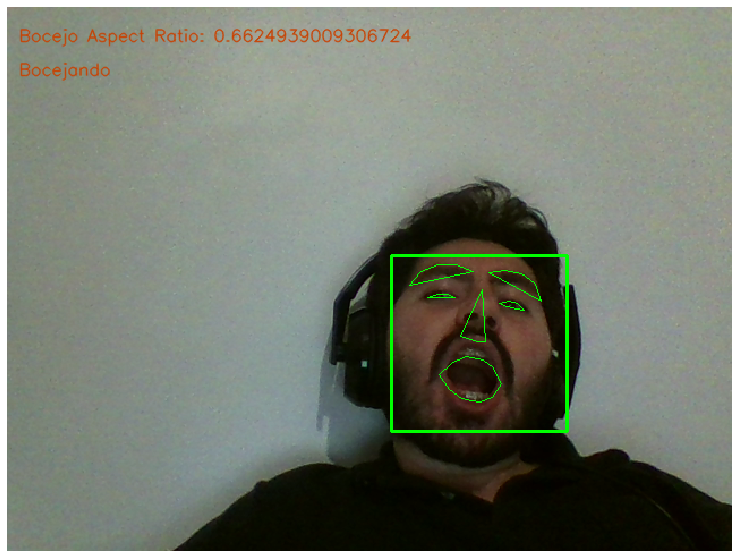

In [19]:
exibir_imagem(nomeImg)

## 5. Detector de olhos fechados

A atenção durante um processo de entrevista é algo crucial, e mais marcante neste etapa do processo seletivo. Por esta razão é preciso identificar a quantidade de vezes que o entrevistado feche os olhos, para entendermos se ele de fato está atento as perguntas e ao processo como um todo.

Elabore um algoritmo que detecte os olhos fechados e contabilize ao final da transmissão.

Este caso requer um estudo também geométrico que visa analisar os pontos da marcação dos olhos. Para fins de simplificação, podemos adotar um único olho, e a partir dele, estebelecer o razão de aspecto para quando ele está aberto e fechado.

Construa uma função chamada ```eye_aspect_ratio``` para calcular o aspecto de razão de um dos olhos.

In [ ]:
# função definida junto com proporção da boca

Altere a função ```annotate_landmarks_convex_hull_image``` para exibir, no terceiro parâmetro o valor de aspecto de um dos olhos.

No caso do olho, precisamos definir somente um valor máximo de limite.

In [ ]:
# valores no bloco abaixo

In [20]:
cap = cv2.VideoCapture( 0 )
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)
nomeImg = 'imagens/olhos_fechados.png'
qtd = 0
olho_maximo = 0.20
detectado = False

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break

    frame, _, eye_aspect = annotate_landmarks_convex_hull_image(frame)
    prevDetectado = detectado
    detectado = False

    if eye_aspect < olho_maximo:
        detectado = True
        if prevDetectado is False:
            qtd += 1

    cv2.putText(
        frame, 'Olhos Aspect Ratio: '+ str( eye_aspect ) ,(10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)
    cv2.putText(
        frame, 'Fechados' if detectado else 'Abertos' ,(10,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (0,64,200), 1, cv2.LINE_AA)

    if detectado:
        cv2.imwrite( nomeImg, frame )

    cv2.imshow('Detector de olhos fechados', frame)
    btnPressionado = cv2.waitKey( delay ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        break

cap.release()
cv2.destroyAllWindows()
print("Olhos fechados identificados: %s" % str(qtd))

Olhos fechados identificados: 2


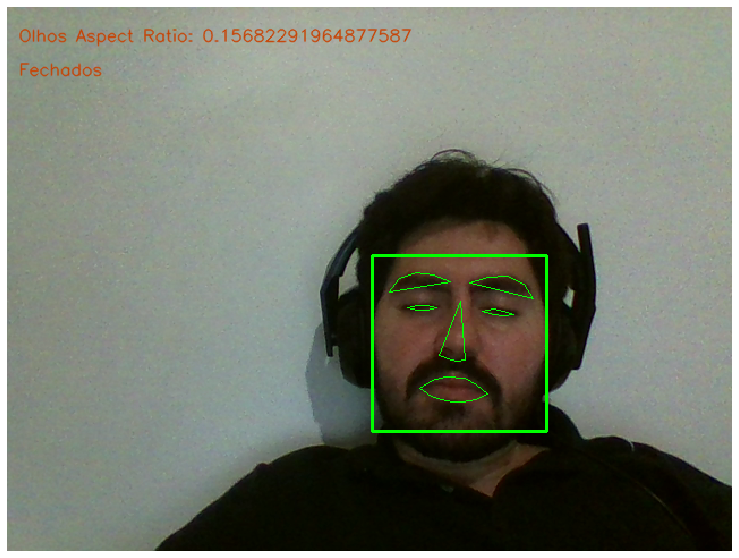

In [21]:
exibir_imagem(nomeImg)

## 6. Descritor de objetos na cena

A organização do local na casa do entrevistado é um item relevante, pois a partir destes detalhes é possível traçar alguns tipos de perfis que são essenciais para certas posições nas empresas.

Desta forma precisamos construir um algoritmo que realize uma inspeção de objetos na área da câmera que é utilizada para fazer a entrevista. Ao final mostre quais e quantos objetos foram detectados.

É necessário baixar os pesos (modelo de deep-learning) neste link https://pjreddie.com/media/files/yolov3.weights e copiar para  pasta weights.

In [22]:
from utils import *
from darknet import Darknet

# Configurações na rede neural YOLOv3
# iremos carregar uma configuração que usa o tamanho da imagem que será analisada
# menor que o padrão, para tentar analisar a imagem em tempo real.
# A velocidade de detecção com a imagem menor que o padrão é aproximadamente 170ms.
cfg_file = 'cfg/yolov3_rapido.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = 'weights/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

Ajuste os valores de NMS (_Non-Maximum Supression_) para regular a sensibilidade de imagens com baixa luminosidade e IOU (_Intersect of Union_) que definie o indicador se o retângulo de identificação de imagem foi adequadamente desenhado.

In [23]:
# valores no bloco abaixo
nms_thresh = 0.6
iou_thresh = 0.4

Separe um imagem que será analisada pelo classificador, após teclar o _Enter_. Armazene no diretório ```imagens/local-entrevista.png```.

In [24]:

cap = cv2.VideoCapture( 0 )
nomeImg = 'imagens/local-entrevista.png'

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break

    copia   = frame.copy() # para salvar o original no arquivo mais tarde
    resImg  = cv2.resize(copia, (m.width, m.height))
    boxes   = detect_objects(m, resImg, iou_thresh, nms_thresh)
    # a função abaixo foi criado no arquivo "utils.py" para que retornace a imagem com os
    # retângulos para ser apresentada em tempo real
    copia   = plot_boxes_rapido( copia, boxes, class_names, plot_labels = True )

    cv2.imshow('Detector de objetos', copia)
    btnPressionado = cv2.waitKey( 1 ) & 0xFF
    if btnPressionado == ord('q') or btnPressionado == 13 or btnPressionado == 27 :
        cv2.imwrite( nomeImg, frame ) # salvar o frame originl (sem os retângulos)
        break

cap.release()
cv2.destroyAllWindows()



It took 0.257 seconds to detect the objects in the image.



It took 0.345 seconds to detect the objects in the image.



It took 0.191 seconds to detect the objects in the image.



It took 0.202 seconds to detect the objects in the image.



It took 0.199 seconds to detect the objects in the image.



It took 0.204 seconds to detect the objects in the image.



It took 0.284 seconds to detect the objects in the image.



It took 0.190 seconds to detect the objects in the image.



It took 0.240 seconds to detect the objects in the image.



It took 0.203 seconds to detect the objects in the image.



It took 0.315 seconds to detect the objects in the image.



It took 0.208 seconds to detect the objects in the image.



It took 0.195 seconds to detect the objects in the image.



It took 0.197 seconds to detect the objects in the image.



It took 0.191 seconds to detect the objects in the image.



It took 0.197 seconds to detect the objects in the image.



It took 0.210 seconds 

A imagem a ser analisada.

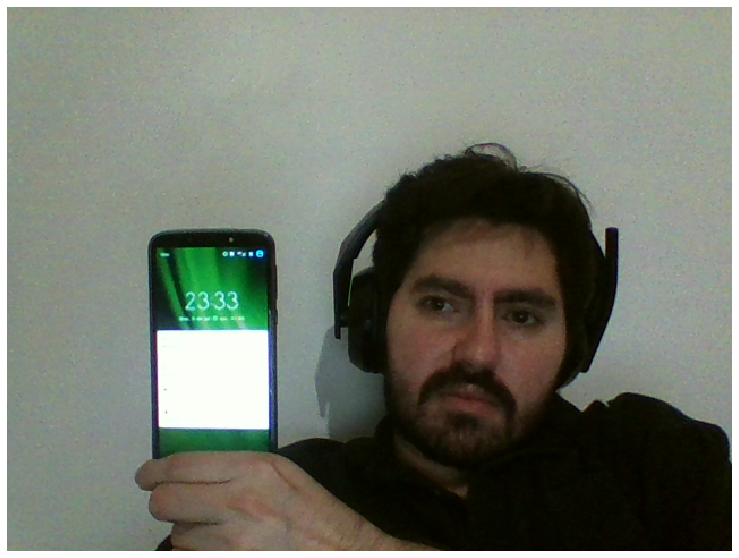

In [25]:
exibir_imagem(nomeImg)

Os passos abaixo são para configuração da imagem no padrão que o classificador foi treinado.




It took 0.644 seconds to detect the objects in the image.

Objects Found and Confidence Level:

1. person: 1.000000
2. cell phone: 1.000000


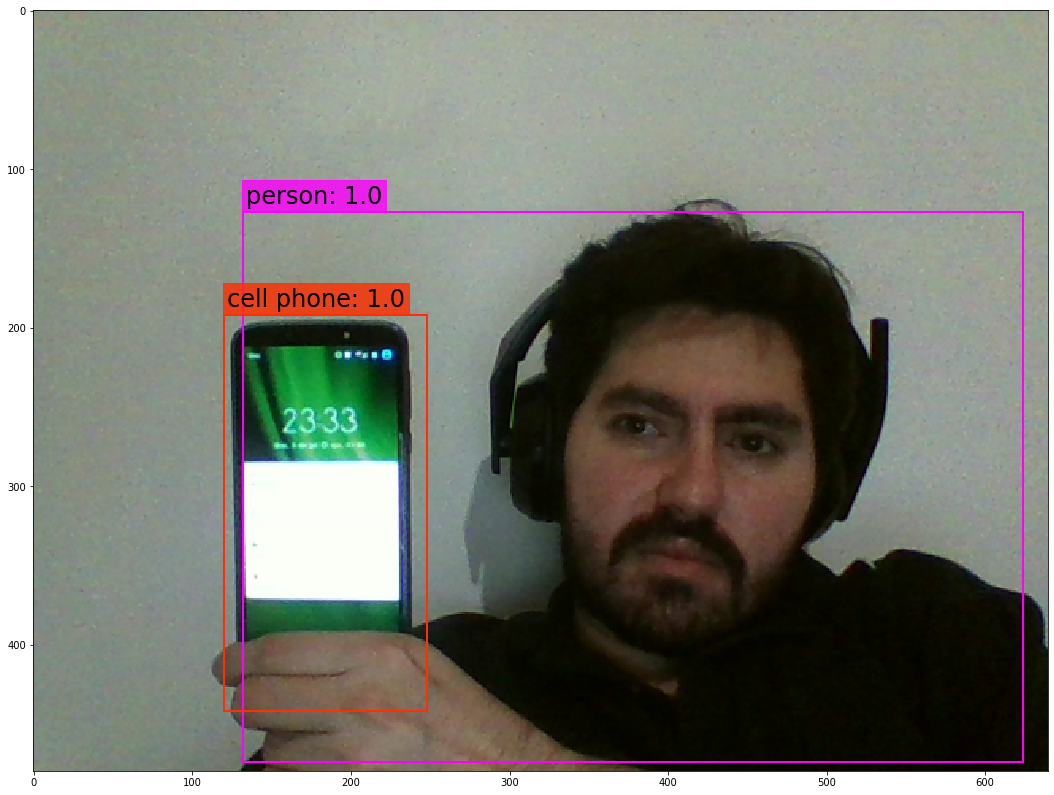

In [26]:

# essa função irá criar um analisador Yolo no tamanho padrão
# para tentar obter um melhor resulatdo durante a detecção.
# A velocidade de detecção com a imagem no tamanho padrão é aproximadamente 750ms.
def analisar_imagem():
    # Configurações na rede neural YOLOv3
    cfg_file = 'cfg/yolov3.cfg'
    m = Darknet(cfg_file)

    # Pesos pré-treinados
    weight_file = 'weights/yolov3.weights'
    m.load_weights(weight_file)

    # Rótulos de classes
    namesfile = 'data/coco.names'
    class_names = load_class_names(namesfile)

    # ---
    # Definindo tamnaho do gráfico
    plt.rcParams['figure.figsize'] = [24.0, 14.0]

    # Carregar imagem para classificação
    img = cv2.imread('imagens/local-entrevista.png')

    # Conversão para o espaço RGB
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Redimensionamento para adatapção da primeira camada da rede neural 
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Deteteção de objetos na imagem
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Objetos encontrados e nível de confiança
    print_objects(boxes, class_names)

    # Desenho no gráfico com os regângulos e rótulos
    plot_boxes(original_image, boxes, class_names, plot_labels = True)

    return boxes


boxes = analisar_imagem() # executar analise

Obtenha os objetos identificados a partir da função ```list_objects(boxes, class_names)```. Será retornardo uma lista de objetos que deverá ser analisado para contar a quantidade de cada objeto. Se houver mais de um item igual, por exemplo _tvmonitor_ ele aparecerá duplicado na imagem.

In [27]:
# IMPLEMENTAR
# Conte os objetos identificados pelo classificador, de forma que seja exibido 
# objeto 1, quantidade 1
# objeto 2, quantidade 1
# ...

# listar objetos detectados e as quantidades
objetos = list_objects(boxes, class_names)
objetosMap = {}
for item in objetos:
    if item in objetosMap:
        objetosMap[ item ] += 1
    else:
        objetosMap[ item ] = 1

for key in objetosMap.keys():
    print( '%s: %d' % (key, objetosMap[key]) )

person: 1
cell phone: 1


## Conclusões finais

**Pergunta:** Diante de todos os desafios propostos (1 ao 6) e soluções encontradas, quais seriam os próximos passos de forma a tornar mais precisos cada atividade, levando em consideração: (1) restrições de processamento em tempo real, (2) sem restrições de processamento em tempo real?

**Resposta**: